<h1 align="center">Exploratory Data Analysis</h1>

Libraries

In [1]:
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns

Descargamos el DataSet y visualizamos las primeras filas que contiene:

In [2]:
file_path = '/home/oscar/data/feature_frame.csv'
df = pd.read_csv(file_path, low_memory=False)
#print(df.head())

**Quick checks**

In [3]:
print("Número de filas y columnas:", df.shape)

Número de filas y columnas: (2880549, 27)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

Observamos que no hay valores nulos ni nan a priori en el Dataset para ninguna de las variables:

In [5]:
print(df.isnull().sum())

variant_id                          0
product_type                        0
order_id                            0
user_id                             0
created_at                          0
order_date                          0
user_order_seq                      0
outcome                             0
ordered_before                      0
abandoned_before                    0
active_snoozed                      0
set_as_regular                      0
normalised_price                    0
discount_pct                        0
vendor                              0
global_popularity                   0
count_adults                        0
count_children                      0
count_babies                        0
count_pets                          0
people_ex_baby                      0
days_since_purchase_variant_id      0
avg_days_to_buy_variant_id          0
std_days_to_buy_variant_id          0
days_since_purchase_product_type    0
avg_days_to_buy_product_type        0
std_days_to_

In [6]:
print(df.describe())

         variant_id      order_id       user_id  user_order_seq       outcome  \
count  2.880549e+06  2.880549e+06  2.880549e+06    2.880549e+06  2.880549e+06   
mean   3.401250e+13  2.978388e+12  3.750025e+12    3.289342e+00  1.153669e-02   
std    2.786246e+11  2.446292e+11  1.775710e+11    2.140176e+00  1.067876e-01   
min    3.361529e+13  2.807986e+12  3.046041e+12    2.000000e+00  0.000000e+00   
25%    3.380354e+13  2.875152e+12  3.745901e+12    2.000000e+00  0.000000e+00   
50%    3.397325e+13  2.902856e+12  3.812775e+12    3.000000e+00  0.000000e+00   
75%    3.428495e+13  2.922034e+12  3.874925e+12    4.000000e+00  0.000000e+00   
max    3.454300e+13  3.643302e+12  5.029635e+12    2.100000e+01  1.000000e+00   

       ordered_before  abandoned_before  active_snoozed  set_as_regular  \
count    2.880549e+06      2.880549e+06    2.880549e+06    2.880549e+06   
mean     2.113868e-02      6.092589e-04    2.290188e-03    3.629864e-03   
std      1.438466e-01      2.467565e-02    4.

Tras revisar los datos tenemos un conjunto con 27 características y 2880549 observaciones. Ninguna de las características presenta null-values. Evaluamos los diferentes datos y revisamos los datatypes:

1. **Información general del pedido y usuario:**
- 'order_id' : identificador único del pedido (int64)
- 'user_id' : identificado único del usuario (int64)
- 'created_at' : fecha y hora de creación del registro (object)
- 'order_date' : fecha del pedido (object)

El identificador único del pedido y del usuario debería ser tratado como una variable categórica y las diferentes fechas del pedido y de creación del registro deben de ser de tipo datetime:

In [7]:
df['order_id'] = df['order_id'].astype('object')
df['user_id'] = df['user_id'].astype('object')
df['created_at'] = pd.to_datetime(df['created_at'])
df['order_date'] = pd.to_datetime(df['order_date'])

Evalúo el número de órdenes únicas y de usuarios únicos, tengo 3446 números de orden únicos y 1937 usuarios únicos.

In [8]:
# Explorar 'order_id'
print("Número de órdenes únicas:", len(df['order_id'].unique()))
print(df['order_id'].value_counts())

# Explorar 'user_id'
print("Número de usuarios únicos:", len(df['user_id'].unique()))
print(df['user_id'].value_counts())

Número de órdenes únicas: 3446
order_id
3643301986436    976
3643199160452    976
3642856079492    976
3642900349060    976
3642919485572    976
                ... 
2808434524292    614
2808393957508    611
2808099078276    608
2808027644036    608
2807985930372    608
Name: count, Length: 3446, dtype: int64
Número de usuarios únicos: 1937
user_id
3437823688836    12649
3824818061444     9427
3523174531204     7848
3461371953284     7638
3775951732868     7192
                 ...  
3315720519812      642
3766351462532      640
3421126885508      624
3539005440132      624
3537167515780      614
Name: count, Length: 1937, dtype: int64


Se observa que hay usuarios repetidos que realizan más de un pedido. Estas variables se toman como categóricas porque son un identificador -> ¿Luego las codifico meterlas al modelo con un label encoding por ejemplo?

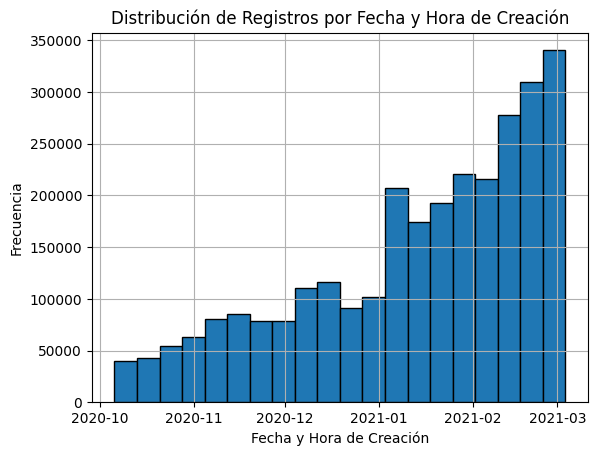

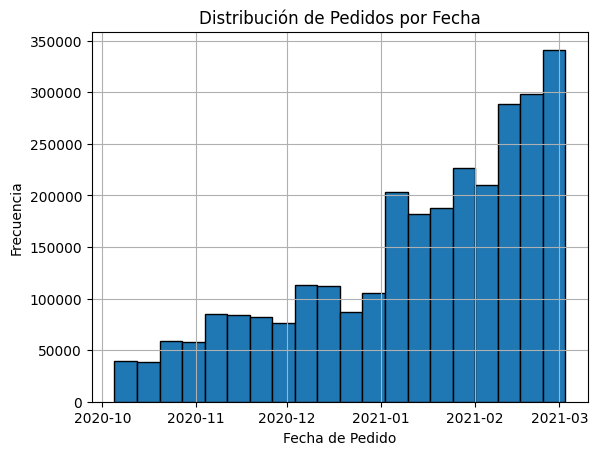

In [9]:
# Histograma de 'created_at'
df['created_at'].hist(bins=20, edgecolor='black')
plt.xlabel('Fecha y Hora de Creación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Registros por Fecha y Hora de Creación')
plt.show()

# Histograma de 'order_date'
df['order_date'].hist(bins=20, edgecolor='black')
plt.xlabel('Fecha de Pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución de Pedidos por Fecha')
plt.show()

Hay una tendencia ascendente de la fecha del pedido y la fecha y hora de creación desde el 10-2020 hasta el 03-2021. Esto indica que se han comprado mayor cantidad de productos últimamente o que, la mayor parte de los datos se concentran en fechas de 2021.

**2. Información del producto y variante:**

- 'variant_id': Identificador único de la variante del producto. (int64)
- 'product_type': Tipo de producto. (object)
- 'vendor': Proveedor del producto. (object)
- 'normalised_price': Precio normalizado del producto. (float64)
- 'discount_pct': Porcentaje de descuento aplicado. (float64)

Vemos que hay 976 variantes únicas de los productos. En este sentido, las más vistas aparecen 3446 veces mientras que la menos vista aparece únicamente 25 veces en el DataSet.

In [10]:
df['variant_id'] = df['variant_id'].astype('object')
print("Número de variantes únicas:", len(df['variant_id'].unique()))
print(df['variant_id'].value_counts())

Número de variantes únicas: 976
variant_id
33826472919172    3446
33826424127620    3446
33826448015492    3446
33667262972036    3446
33667207037060    3446
                  ... 
34534187565188     133
34539372740740     127
34537143828612      73
34537143763076      66
34519123886212      25
Name: count, Length: 976, dtype: int64


Vemos el número de tipos de productos distintos y de vendedores que existen. Existen 62 tipos de productos distintos y 264 vendedores, destacando entre los productos los alimentos enlatados como los más vistos, seguido de condimentos y aderezos y, a su vez, de arroz, pasta y legumbres.
En cuanto a las marcas más vistas destacan biona, ecover y method.

In [11]:
print("Número de tipos de producto únicos:", len(df['product_type'].unique()))
print(df['product_type'].value_counts())

print("Número de tipos de vendedores:", len(df['vendor'].unique()))
print(df['vendor'].value_counts())

Número de tipos de producto únicos: 62
product_type
tinspackagedfoods         226474
condimentsdressings       129749
ricepastapulses           128098
haircare                  114978
cookingingredientsoils    110686
                           ...  
babyfood12months            6797
householdsundries           6735
petcare                     4075
feedingweaning              2790
premixedcocktails           2620
Name: count, Length: 62, dtype: int64
Número de tipos de vendedores: 264
vendor
biona         146828
ecover        113018
method         79258
organix        74632
treeoflife     68920
               ...  
minky            599
vitalbaby        594
munchkin         422
freee            336
vicks            243
Name: count, Length: 264, dtype: int64


Al analizar el precio normalizado, su valor máximo es 1, siendo este el producto más caro. Los precios están normalizados entre 0 y 1 para facilitar las comparaciones probablemente. En cuanto al descuento, hay cifras de descuento menores a cero y mayores a 1 lo cual, a priori, no tendría sentido, estaríamos hablando de un descuento superior al 100% y no tiene sentido hablar de un descuento negativo.

In [12]:
print("Estadísticas de 'normalised_price':")
print(df['normalised_price'].describe())

print("\nEstadísticas de 'discount_pct':")
print(df['discount_pct'].describe())

Estadísticas de 'normalised_price':
count    2.880549e+06
mean     1.272808e-01
std      1.268378e-01
min      1.599349e-02
25%      5.394416e-02
50%      8.105178e-02
75%      1.352670e-01
max      1.000000e+00
Name: normalised_price, dtype: float64

Estadísticas de 'discount_pct':
count    2.880549e+06
mean     1.862744e-01
std      1.934480e-01
min     -4.016064e-02
25%      8.462238e-02
50%      1.169176e-01
75%      2.234637e-01
max      1.325301e+00
Name: discount_pct, dtype: float64


Evaluamos los casos en los que tenemos un descuento  superior a 1 e inferior a 0:

In [13]:
unusual_dicounts_df_negative = df[(df['discount_pct'] < 0)]
print(len(unusual_dicounts_df_negative.index))

unusual_dicounts_df_up_to_1 = df[(df['discount_pct'] > 1)]
print(len(unusual_dicounts_df_up_to_1.index))


1587
58582


Vemos que hay 1587 casos con un descuento negativo y 58582 casos con un descuento superior a 1. Habría que preguntar al negocio si esto realmente tiene sentido.

**3. Características del usuario y comportamiento de compra:** 

- user_order_seq: Secuencia de orden del usuario. (int64)
- outcome: Indica si el producto fue comprado o no en ese pedido. (float64)
- ordered_before: Indica si el producto fue ordenado previamente. (float64)
- abandoned_before: Indica si el producto fue abandonado anteriormente. (float64)
- active_snoozed: Indica si el producto está activo o en modo de espera. (float 64)
- set_as_regular: Indica si el producto se estableció como regular. (float 64)

In [14]:
print("Número secuencia de orden del usuario:", len(df['user_order_seq'].unique()))
print(df['user_order_seq'].value_counts())

Número secuencia de orden del usuario: 20
user_order_seq
2     1430901
3      636444
4      336602
5      178941
6      108894
7       60170
8       37906
9       22862
10      15430
11      10566
12       9092
13       8167
14       6488
15       5819
16       4190
18       2734
17       2597
21        949
20        914
19        883
Name: count, dtype: int64


La variable 'user_order_seq' está directamente relacionada con el usuario e indica el número de pedidos que ha realizado cada uno de los usuarios. Se observa una clara tendencia decreciente a medida que aumenta el número de orden, concentrándose la mayor parte de usuarios en 2 pedidos.

Visualizo esa tendencia decreciente de la secuencia de orden de los usuarios:

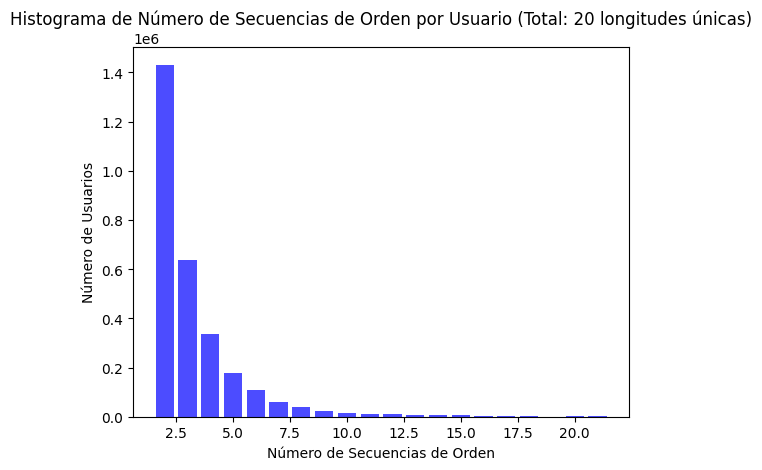

In [15]:
unique_seq_lengths = len(df['user_order_seq'].unique())
seq_count = df['user_order_seq'].value_counts()

plt.bar(seq_count.index, seq_count.values, color='blue', alpha=0.7)

plt.xlabel('Número de Secuencias de Orden')
plt.ylabel('Número de Usuarios')
plt.title(f'Histograma de Número de Secuencias de Orden por Usuario (Total: {unique_seq_lengths} longitudes únicas)')

plt.show()

Ahora voy a ver cómo se comportan el resto de variables binarias. Están codificadas todas ellas como float pero, al tratase de variables binarias, por simplicidad, se van a tratar como int.

In [16]:
binary_variables = ['outcome', 'ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']
df[binary_variables] = df[binary_variables].astype(int)

for var in binary_variables:
    print(f'Valores únicos y frecuencia para {var}:\n{df[var].value_counts()}\n')

Valores únicos y frecuencia para outcome:
outcome
0    2847317
1      33232
Name: count, dtype: int64

Valores únicos y frecuencia para ordered_before:
ordered_before
0    2819658
1      60891
Name: count, dtype: int64

Valores únicos y frecuencia para abandoned_before:
abandoned_before
0    2878794
1       1755
Name: count, dtype: int64

Valores únicos y frecuencia para active_snoozed:
active_snoozed
0    2873952
1       6597
Name: count, dtype: int64

Valores únicos y frecuencia para set_as_regular:
set_as_regular
0    2870093
1      10456
Name: count, dtype: int64



Se observa que, del total de datos, únicamente 33000 registros aproximadamente acaban comprando el producto y que, la mayoría de los productos no se establecen como regulares, ni fueron abandonados previamente ni están en espera ni fueron ordenados previamente.

**4. Información sobre la popularidad y conteo de productos:**

- global_popularity: Popularidad global del producto. (float64)
- count_adults, count_children, count_babies, count_pets: Cantidad de adultos, niños, bebés y mascotas en el pedido. (float64)
- people_ex_baby: Cantidad de personas excluyendo bebés en el pedido. (float64)

Evaluamos primero los diferentes grupos demográficos asociados a cada pedido. Como conclusión se ve que la mayor parte de los pedidos están asociados a dos adultos sin niños, bebés ni mascotas aunque hay excepciones, llegando a 5 niños, 1 bebé o incluso 6 mascotas.

In [17]:
for var in ['count_adults', 'count_children', 'count_babies', 'count_pets', 'people_ex_baby']:
    print(f"Valores únicos y frecuencia para {var}:\n{df[var].value_counts()}\n")


Valores únicos y frecuencia para count_adults:
count_adults
2.0    2825732
3.0      24441
4.0      13481
1.0      12828
5.0       4067
Name: count, dtype: int64

Valores únicos y frecuencia para count_children:
count_children
0.0    2790935
2.0      46033
1.0      32302
3.0      11279
Name: count, dtype: int64

Valores únicos y frecuencia para count_babies:
count_babies
0.0    2870356
1.0      10193
Name: count, dtype: int64

Valores únicos y frecuencia para count_pets:
count_pets
0.0    2773965
1.0      74436
2.0      28087
3.0       2362
6.0       1699
Name: count, dtype: int64

Valores únicos y frecuencia para people_ex_baby:
people_ex_baby
2.0    2765852
4.0      50084
3.0      37161
5.0      24776
1.0       2676
Name: count, dtype: int64



Evaluamos ahora la variable de la popularidad global del producto y cómo se distribuye:

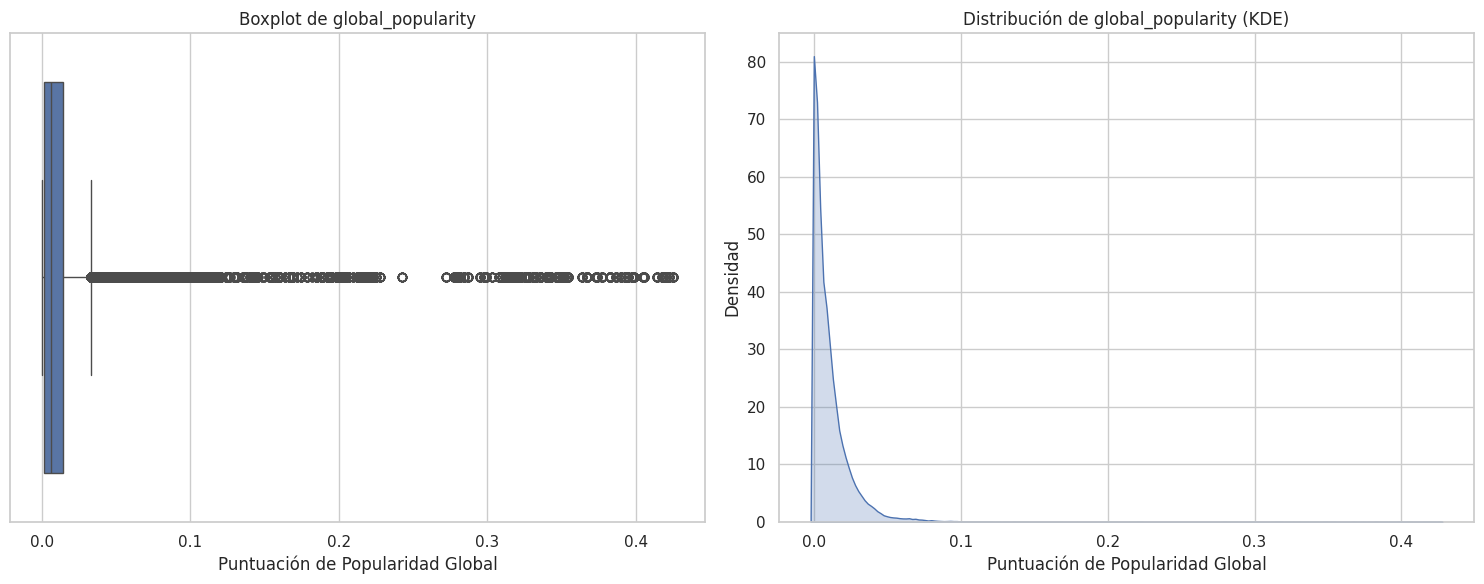

In [18]:
sns.set(style="whitegrid")

# Crear el boxplot y kdeplot
plt.figure(figsize=(15, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['global_popularity'])
plt.title('Boxplot de global_popularity')
plt.xlabel('Puntuación de Popularidad Global')

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['global_popularity'], fill=True)
plt.title('Distribución de global_popularity (KDE)')
plt.xlabel('Puntuación de Popularidad Global')
plt.ylabel('Densidad')

# Ajustes de diseño
plt.tight_layout()
plt.show()

Tras visualizar la distribución de los datos, vemos que la mayor parte de ellos se concentran entre 0 y 0.1. No obstante, hay varios ejemplos que salen del rango intercuartílico*1.5 y podrían ser considerados outliers pero, en este caso, dado que son los productos de mayor popularidad, no tendría sentido quitarlos ya que resultan información muy valiosa.

**5. Información temporal, todos float64:**

- days_since_purchase_variant_id: Días desde la compra para la variante específica.
- avg_days_to_buy_variant_id: Promedio de días para comprar la variante específica.
- std_days_to_buy_variant_id: Desviación estándar de días para comprar la variante específica.
- days_since_purchase_product_type: Días desde la compra para el tipo de producto.
- avg_days_to_buy_product_type: Promedio de días para comprar el tipo de producto.
- std_days_to_buy_product_type: Desviación estándar de días para comprar el tipo de producto.

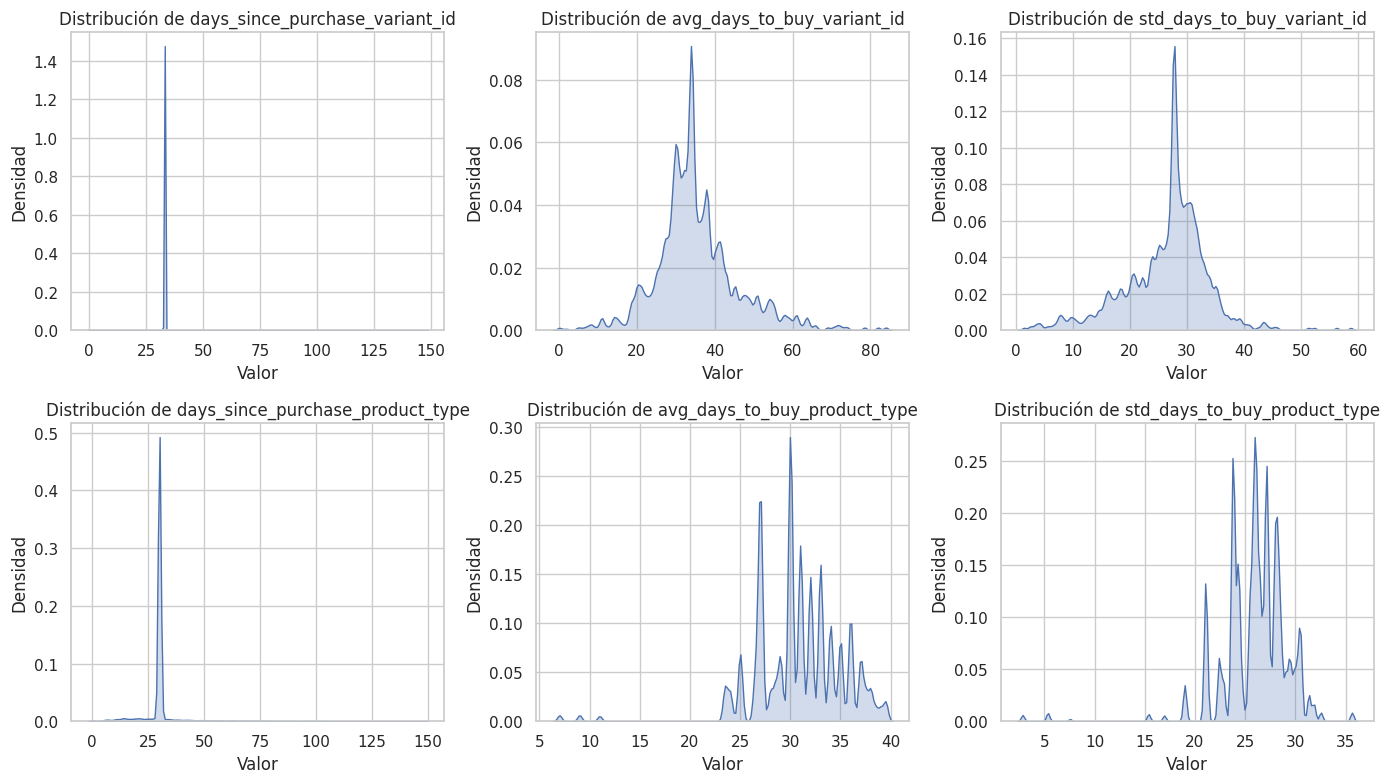

In [19]:
temporal_variables = [
    'days_since_purchase_variant_id', 'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id',
    'days_since_purchase_product_type', 'avg_days_to_buy_product_type', 'std_days_to_buy_product_type'
]

plt.figure(figsize=(14, 8))

for i, var in enumerate(temporal_variables, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(df[var], fill=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel('Valor')
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

In [20]:
print(df[[
    'days_since_purchase_variant_id', 'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id',
    'days_since_purchase_product_type', 'avg_days_to_buy_product_type', 'std_days_to_buy_product_type'
]].describe())

       days_since_purchase_variant_id  avg_days_to_buy_variant_id  \
count                    2.880549e+06                2.880549e+06   
mean                     3.312961e+01                3.523734e+01   
std                      3.707162e+00                1.057766e+01   
min                      0.000000e+00                0.000000e+00   
25%                      3.300000e+01                3.000000e+01   
50%                      3.300000e+01                3.400000e+01   
75%                      3.300000e+01                4.000000e+01   
max                      1.480000e+02                8.400000e+01   

       std_days_to_buy_variant_id  days_since_purchase_product_type  \
count                2.880549e+06                      2.880549e+06   
mean                 2.645304e+01                      3.143513e+01   
std                  7.168323e+00                      1.227511e+01   
min                  1.414214e+00                      0.000000e+00   
25%                  2.

Tras comprobar los valores, parece que todos los valores son coherentes y no hay valores negativos. Además, se observa en las distintas distribuciones que la media y la distribución típica de los días para comprar una variante específica se corresponde a una distribución muy similar a una normal, mientras que para el tipo de producto esta distribución es más variable. Con respecto a la distribución de los días desde la última compra para cada producto y cada variante, la distribución es prácticamente una normal y la mayor parte de sus valores se concentran en los 33 días. 

Terminando con las últimas comprobaciones, vamos a ver si existen filas u observaciones duplicadas:

In [21]:
print(df.duplicated().sum())

0


Tras la corrección de los diferentes Datatypes y el análisis univariante observamos los diferentes tipos de nuestras variables:

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   variant_id                        object        
 1   product_type                      object        
 2   order_id                          object        
 3   user_id                           object        
 4   created_at                        datetime64[ns]
 5   order_date                        datetime64[ns]
 6   user_order_seq                    int64         
 7   outcome                           int64         
 8   ordered_before                    int64         
 9   abandoned_before                  int64         
 10  active_snoozed                    int64         
 11  set_as_regular                    int64         
 12  normalised_price                  float64       
 13  discount_pct                      float64       
 14  vendor            

**ANÁLISIS MULTIVARIABLE**

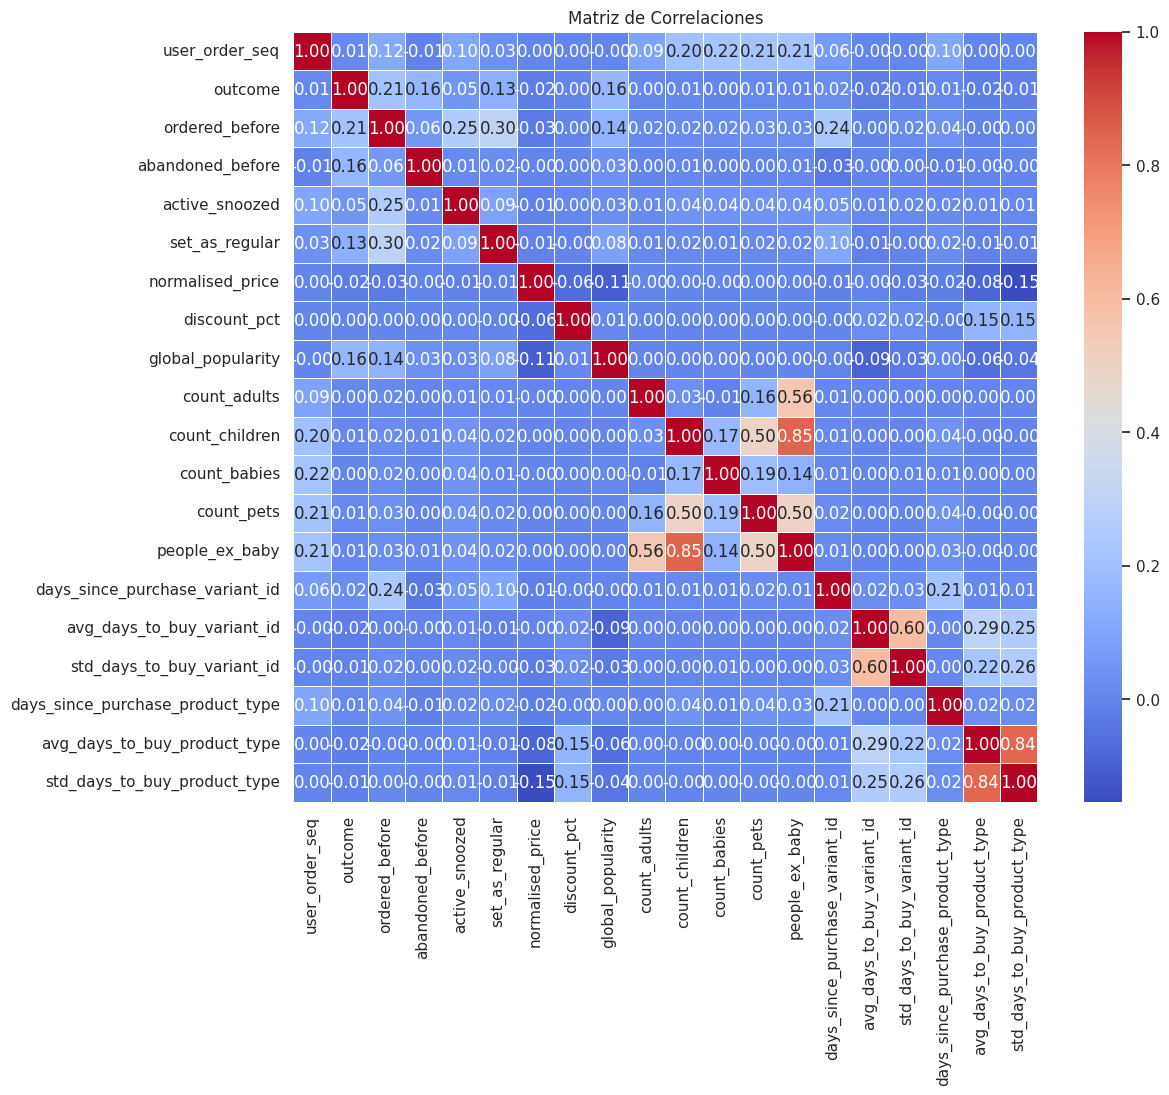

In [23]:
df_numeric = df.select_dtypes(include='number')

# Calcular la matriz de correlaciones
correlation_matrix = df_numeric.corr()

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear un heatmap de la matriz de correlaciones
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Configuración del gráfico
plt.title('Matriz de Correlaciones')
plt.show()

Las correlaciones a destacar son las siguientes:
- Correlación de +0.84 entre 'avg_days_to_buy_product_type' y 'std_days_to_buy_product_type' : esto indica que hay una correlación lineal entre la media de días que se compra un determinado producto y la regularidad con la que se compra dicho producto. Es decir, de forma general, cuanto mayor es la media de días que se tarda en comprar un producto, menor es la regularidad con la que se compra dicho producto.
- Hay una correlación people_ex_babies y las variables count_adults y count_children. Esto se debe a que, probablmente, esta variable esté formada por una combinación lineal de las anteriores, lo cual tiene sentido porque la variable toma las personas sin contar los bebés.

El resto de las correlaciones son muy bajas, por lo que no se pueden extraer resultados significativos.